In [ ]:
#Import all libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dataset
import matplotlib.pyplot as plt

In [ ]:
#Load MNIST data set for the data loader
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

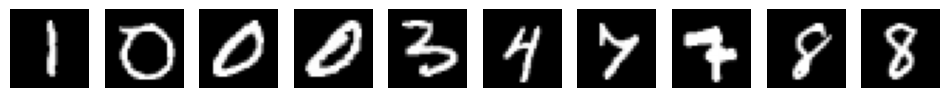

In [ ]:
# Step 2: Visualize several MNIST datasets
import matplotlib.pyplot as plt
%matplotlib inline
def plot_images(images):
  fig, axs = plt.subplots(1, len(images), figsize=(12, 6))
  for i, image in enumerate(images):
    axs[i].imshow(image.squeeze().numpy(), cmap='gray')
    axs[i].axis('off')

#get some images
images, labels = next(iter(train_loader))
plot_images(images[:10])

In [ ]:
#Setup
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.linear1 = nn.Linear(28*28, 100)
    self.linear2 = nn.Linear(100, 50)
    self.final = nn.Linear(50, 10)
    self.relu = nn.ReLU()

  def forward(self, img):
    x = img.view(-1, 28*28)
    x = self.relu(self.linear1(x))
    x = self.relu(self.linear2(x))
    x = self.final(x)
    return x

net = Net()

In [ ]:
cross_el = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
epoch = 10

In [ ]:
#Develop Training
for epoch in range(epoch):
  net.train()
  running_loss = 0.0
  for data in train_loader:
    x, y = data
    optimizer.zero_grad()
    output = net(x.view(-1, 28*28))
    loss = cross_el(output, y)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

    print(f'[{epoch + 1}, {epoch + 1:5d}] loss : {running_loss / 2000:.5f}')

Streaming output truncated to the last 5000 lines.
[5,     5] loss : 0.03214
[5,     5] loss : 0.03225
[5,     5] loss : 0.03232
[5,     5] loss : 0.03246
[5,     5] loss : 0.03255
[5,     5] loss : 0.03259
[5,     5] loss : 0.03263
[5,     5] loss : 0.03268
[5,     5] loss : 0.03270
[5,     5] loss : 0.03274
[5,     5] loss : 0.03279
[5,     5] loss : 0.03287
[5,     5] loss : 0.03291
[5,     5] loss : 0.03302
[5,     5] loss : 0.03309
[5,     5] loss : 0.03318
[5,     5] loss : 0.03324
[5,     5] loss : 0.03336
[5,     5] loss : 0.03340
[5,     5] loss : 0.03348
[5,     5] loss : 0.03353
[5,     5] loss : 0.03361
[5,     5] loss : 0.03368
[5,     5] loss : 0.03376
[5,     5] loss : 0.03384
[5,     5] loss : 0.03386
[5,     5] loss : 0.03392
[5,     5] loss : 0.03400
[5,     5] loss : 0.03412
[5,     5] loss : 0.03415
[5,     5] loss : 0.03417
[5,     5] loss : 0.03421
[5,     5] loss : 0.03425
[5,     5] loss : 0.03431
[5,     5] loss : 0.03435
[5,     5] loss : 0.03438
[5,     5] lo

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, f1_score
correct = 0
total = 0
all_labels = []
all_predictions = []

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # Konversi images ke tensor PyTorch
        images = torch.tensor(images, dtype=torch.float32)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted.numpy())


accuracy = accuracy_score(all_labels, all_predictions)
confusion = confusion_matrix(all_labels, all_predictions)
classification_report_str = classification_report(all_labels, all_predictions)

print(f"Accuracy: {accuracy * 100}%")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_report_str)

<ipython-input-125-cff69730568a>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  images = torch.tensor(images, dtype=torch.float32)


Accuracy: 97.35000000000001%
Confusion Matrix:
[[ 971    0    1    1    0    2    3    1    1    0]
 [   0 1116    1    3    0    3    4    0    8    0]
 [   5    0 1004    3    3    2    2    8    4    1]
 [   1    0    3  976    0   23    0    4    3    0]
 [   3    0    3    0  956    2    7    2    1    8]
 [   5    0    0    5    1  873    2    0    5    1]
 [   5    4    1    1    3    6  935    0    3    0]
 [   1    3    7    7    1    0    0  997    2   10]
 [   4    0    2    4    1    7    2    3  949    2]
 [   3    2    1   10   11    8    3    7    6  958]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.94      0.98      0.96       892
           6       0

#Hasil
1. Akurasi = 97.35%
2. Precision = minimal 94% maksimal 99%
3. Recall = miniimal 95% maksimal 99%
4. F1 Score = minimal 96% maksimal 99%
5. Support = minimal 892 maksimal 1135

Kesimpulan
Deep Learning dalam Machine Learning MNIST memiliki presentasi yang baik

# New Section